# Chuẩn bị dữ liệu

In [3]:
import pyodbc
import pandas as pd
import numpy as np

Kết nối với sever

In [4]:
server_name = 'DESKTOP-P1EP8UL'
database_name = 'AdventureWorksDW2012'

connection = pyodbc.connect('Driver={SQL Server}; Server=' + server_name +
                      '; Database=' + database_name +
                      '; Trusted_Connection=yes;')



Lấy dữ liệu những khách hàng và thông tin liệu khách hàng đó có mua xe đạp hay không

In [5]:
df = pd.read_sql_query(
    "select c.Gender as gender, \
        c.YearlyIncome as yearly_income, \
        c.MaritalStatus as marital_status, \
        c.TotalChildren as total_children, \
        c.NumberChildrenAtHome as children_at_home, \
        c.HouseOwnerFlag as house_owner, \
        c.NumberCarsOwned as cars_owned, \
        c.EnglishOccupation as occupation, \
        c.EnglishEducation as education,\
        c.CommuteDistance as commute_distance \
        , case sum(case pc.EnglishProductCategoryName when 'Bikes' then 1 else 0 end) \
          when 0 then 0 else 1 end as bikes \
    from FactInternetSales f \
        join DimCustomer c on f.CustomerKey = c.CustomerKey \
        join DimProduct p on f.ProductKey = p.ProductKey \
        join DimProductSubcategory psc on p.ProductSubcategoryKey = psc.ProductSubcategoryKey \
        join DimProductCategory pc on psc.ProductCategoryKey = pc.ProductCategoryKey \
    group by c.Gender, c.YearlyIncome, c.MaritalStatus, c.TotalChildren, c.NumberChildrenAtHome, c.HouseOwnerFlag, \
        c.NumberCarsOwned, c.EnglishOccupation, c.EnglishEducation, c.CommuteDistance",
    connection) 

df.head()

,gender,yearly_income,marital_status,total_children,children_at_home,house_owner,cars_owned,occupation,education,commute_distance,bikes
0,M,90000.0,M,4,1,0,3,Management,High School,5-10 Miles,1
1,F,130000.0,M,1,3,1,3,Management,Bachelors,2-5 Miles,1
2,F,20000.0,M,2,1,1,2,Clerical,Partial High School,1-2 Miles,1
3,M,30000.0,M,1,0,1,1,Manual,High School,1-2 Miles,1
4,M,60000.0,M,3,2,0,2,Professional,Bachelors,0-1 Miles,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4693 entries, 0 to 4692
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4693 non-null   object 
 1   yearly_income     4693 non-null   float64
 2   marital_status    4693 non-null   object 
 3   total_children    4693 non-null   int64  
 4   children_at_home  4693 non-null   int64  
 5   house_owner       4693 non-null   object 
 6   cars_owned        4693 non-null   int64  
 7   occupation        4693 non-null   object 
 8   education         4693 non-null   object 
 9   commute_distance  4693 non-null   object 
 10  bikes             4693 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 403.4+ KB


Ta thu được bộ dữ liệu có 4693 dòng

In [7]:
df.isnull().sum()

gender              0
yearly_income       0
marital_status      0
total_children      0
children_at_home    0
house_owner         0
cars_owned          0
occupation          0
education           0
commute_distance    0
bikes               0
dtype: int64

Dataframe không có dữ liệu null

# Thống kê mô tả

In [8]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,4693,2,M,2381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearly_income,4693.0,NaN,NaN,NaN,71896.441509,39805.370671,10000.0,40000.0,70000.0,100000.0,170000.0
marital_status,4693,2,M,2558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_children,4693.0,NaN,NaN,NaN,2.366503,1.641819,0.0,1.0,2.0,4.0,5.0
children_at_home,4693.0,NaN,NaN,NaN,1.58534,1.747796,0.0,0.0,1.0,3.0,5.0
house_owner,4693,2,1,2913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cars_owned,4693.0,NaN,NaN,NaN,1.821649,1.269832,0.0,1.0,2.0,3.0,4.0
occupation,4693,5,Professional,1609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4693,5,Bachelors,1402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commute_distance,4693,5,0-1 Miles,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Thống kê các giá trị dữ liệu trên các cột loại object

In [9]:
for col in df.select_dtypes(include=object).columns:
    print(f"Column '{col}' data: ")
    print(df[col].value_counts())
    print("=========================")

Column 'gender' data: 
M    2381
F    2312
Name: gender, dtype: int64
Column 'marital_status' data: 
M    2558
S    2135
Name: marital_status, dtype: int64
Column 'house_owner' data: 
1    2913
0    1780
Name: house_owner, dtype: int64
Column 'occupation' data: 
Professional      1609
Management        1256
Skilled Manual     847
Clerical           495
Manual             486
Name: occupation, dtype: int64
Column 'education' data: 
Bachelors              1402
Partial College        1209
High School             849
Graduate Degree         818
Partial High School     415
Name: education, dtype: int64
Column 'commute_distance' data: 
0-1 Miles     1586
2-5 Miles      837
1-2 Miles      763
5-10 Miles     761
10+ Miles      746
Name: commute_distance, dtype: int64


Thống kê các giá trị dữ liệu các cột như total_children, children_at_home, car_owned và bikes

In [10]:
col_list = ['total_children', 'children_at_home', 'cars_owned', 'bikes']
for col in col_list:
    print(f"Column '" + col + "' data: ")
    print(df[col].value_counts())
    print("=================================")

Column 'total_children' data: 
2    972
0    845
4    834
3    762
1    715
5    565
Name: total_children, dtype: int64
Column 'children_at_home' data: 
0    2030
1     679
2     543
3     511
4     508
5     422
Name: children_at_home, dtype: int64
Column 'cars_owned' data: 
2    1502
1    1030
0     869
3     653
4     639
Name: cars_owned, dtype: int64
Column 'bikes' data: 
1    2776
0    1917
Name: bikes, dtype: int64


# Trực quan hóa dữ liệu

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

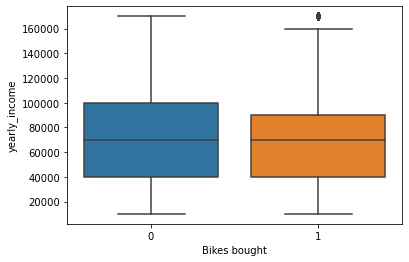

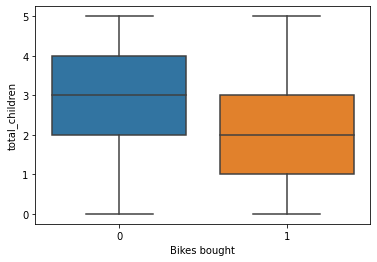

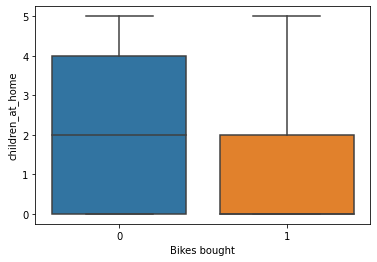

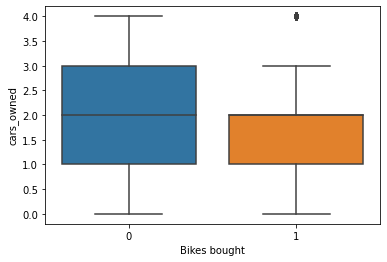

In [50]:
for col in df[['yearly_income', 'total_children', 'children_at_home', 'cars_owned']]:
    sns.boxplot('bikes', col, data=df)
    plt.xlabel('Bikes bought')
    plt.ylabel(col)
    plt.show()

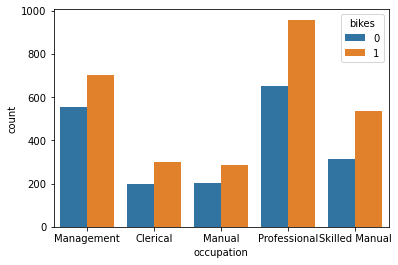

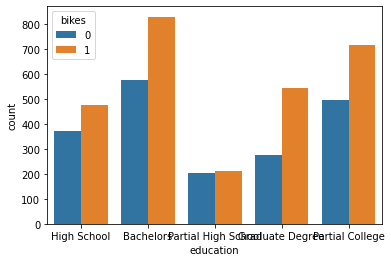

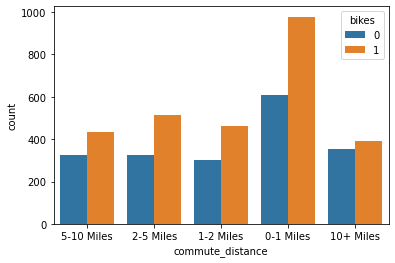

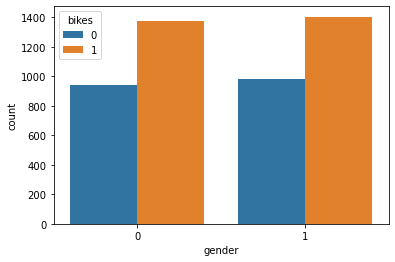

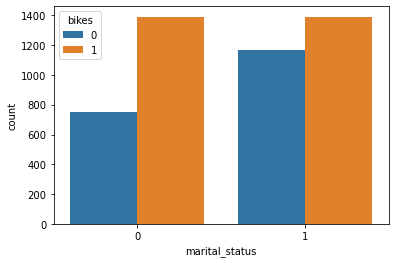

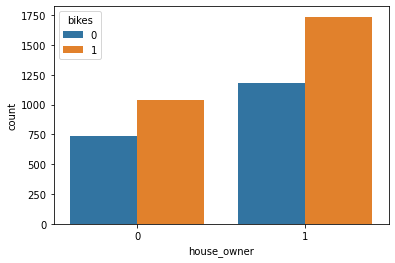

In [51]:
for col in ['occupation', 'education', 'commute_distance', 'gender', 'marital_status', 'house_owner']:
    ax = sns.countplot(x=col, hue='bikes', data=df)
    plt.show()

In [52]:
dummies = pd.get_dummies(df[['gender', 'marital_status','occupation','education','commute_distance']])
df_test = pd.concat([df.drop(columns=['gender', 'marital_status','occupation','education','commute_distance']), dummies], axis=1)
df_test

,yearly_income,total_children,children_at_home,house_owner,cars_owned,bikes,gender,marital_status,occupation_Clerical,occupation_Management,...,education_Bachelors,education_Graduate Degree,education_High School,education_Partial College,education_Partial High School,commute_distance_0-1 Miles,commute_distance_1-2 Miles,commute_distance_10+ Miles,commute_distance_2-5 Miles,commute_distance_5-10 Miles
0,90000.0,4,1,0,3,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,130000.0,1,3,1,3,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,20000.0,2,1,1,2,1,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,30000.0,1,0,1,1,1,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,60000.0,3,2,0,2,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,30000.0,3,3,1,3,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4689,20000.0,3,0,1,2,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4690,90000.0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4691,20000.0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


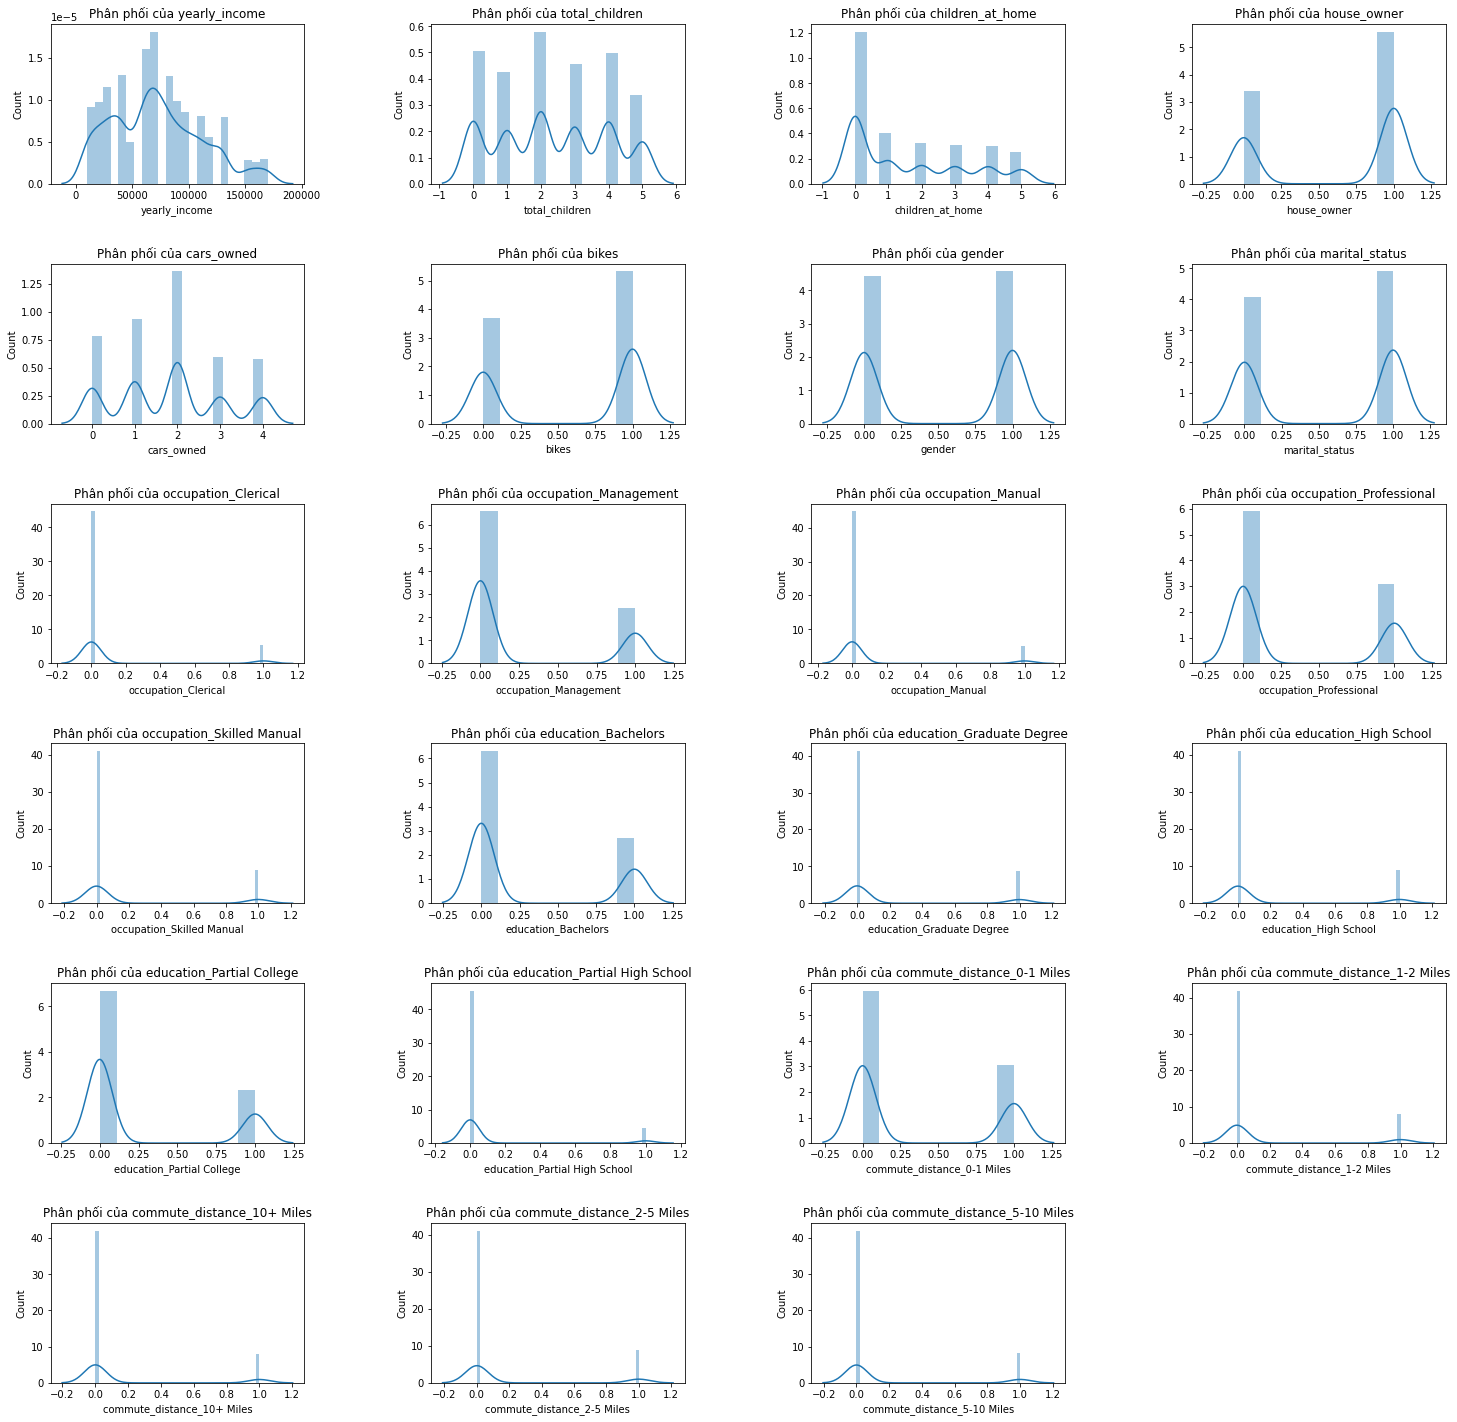

In [53]:
f, ax = plt.subplots(figsize=(25,25))
cols = len(df_test.columns)
for index, col in enumerate(df_test.columns):
  plt.subplot(cols/4 + 1, 4, index+1)
  sns.distplot(df_test[col].dropna())
  plt.title(f"Phân phối của {col}")
  plt.xlabel(col)
  plt.ylabel('Count')

plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()

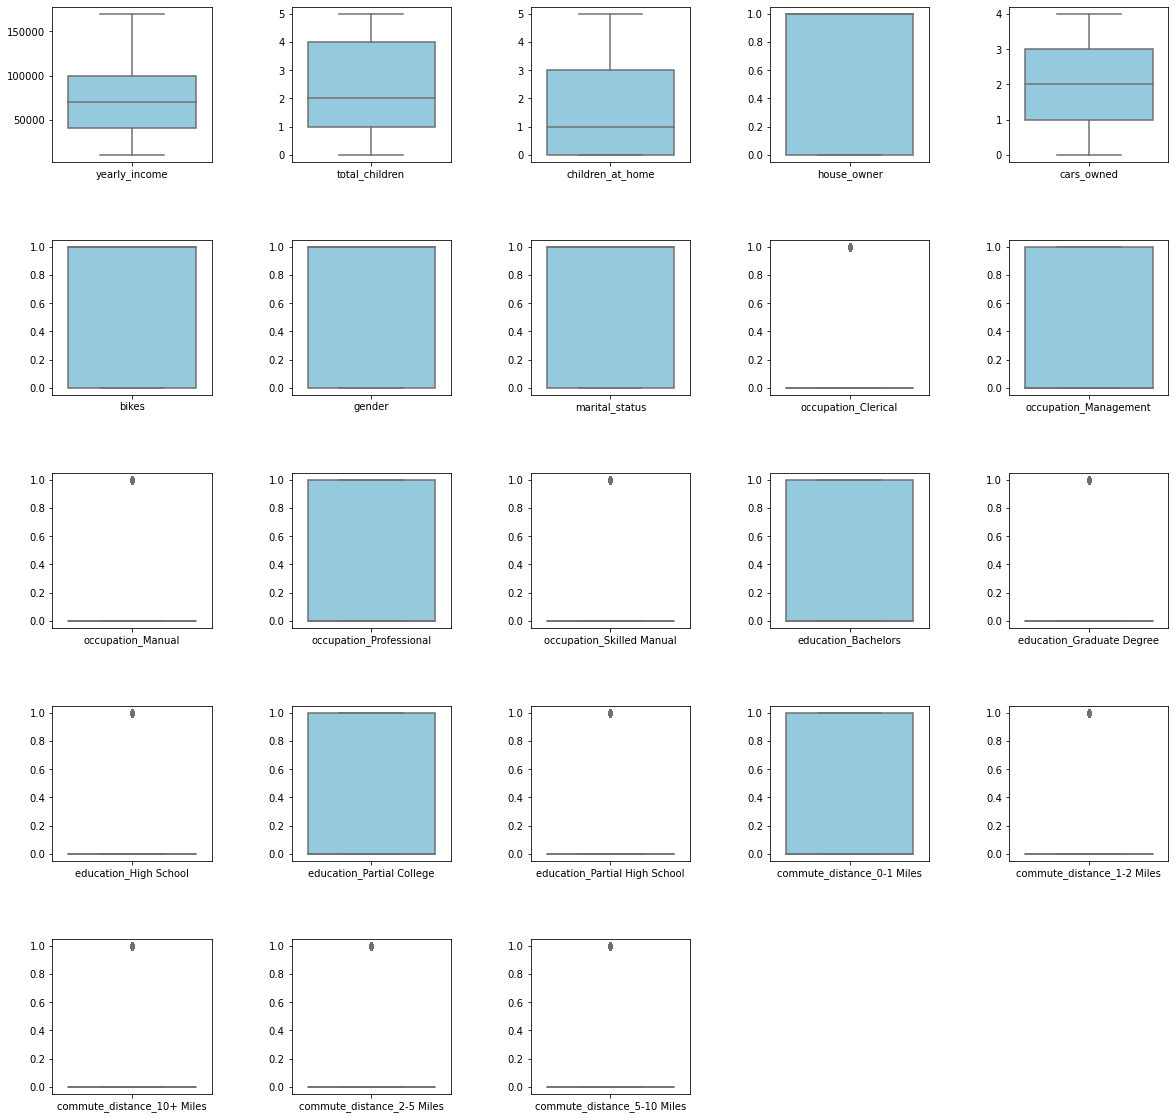

In [55]:
fig, axs = plt.subplots(figsize=(20, 20))
for index, col in enumerate(df_test.columns):
  plt.subplot(cols/5 + 1, 5, index+1)
  sns.boxplot(data=df_test, order=[col], color="skyblue", orient='v')
plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()

<AxesSubplot:>

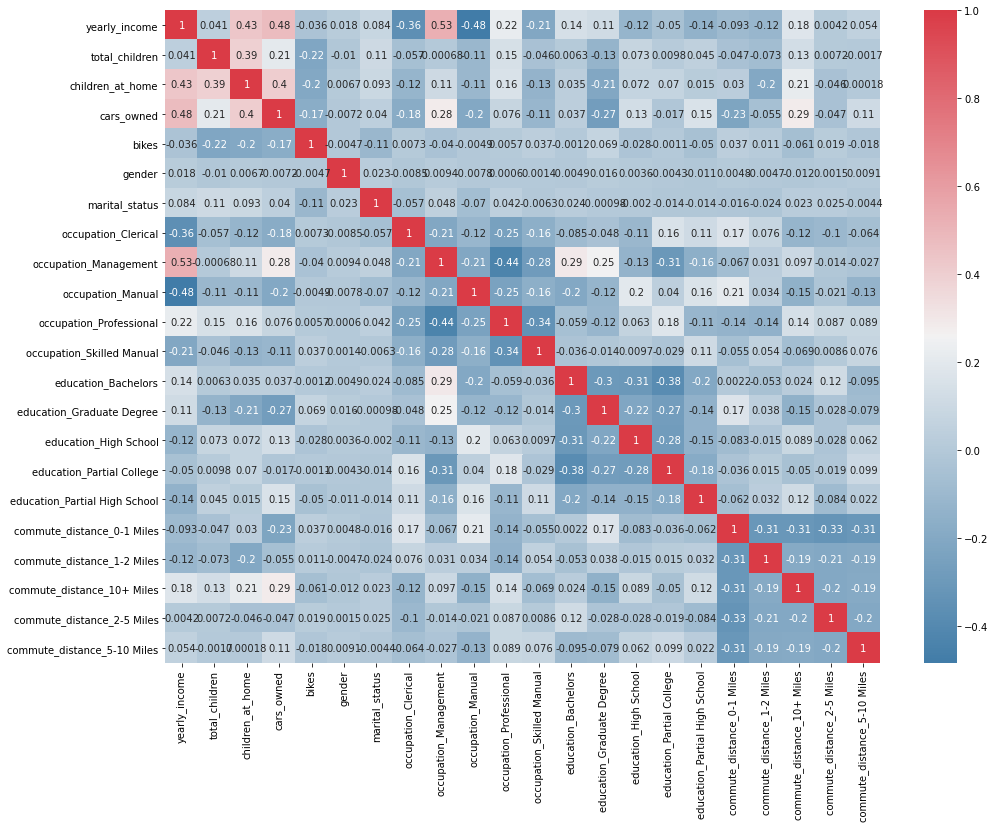

In [56]:
# Sự tương quan giữa các cột dữ liệu
## Ma trận tương quan:
corr = df_test.corr()
f, ax = plt.subplots(figsize=(16, 12))
## diverging_palette: khai báo màu tương ứng với mức độ tương quan
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
## heatmap: biểu đồ nhiệt biểu diễn sự tương quan giữa các cột trong tệp dữ liệu
sns.heatmap(corr, annot=True, cmap=cmap)

# Gom cụm

Lấy 2 cột yearly_income và bikes

In [28]:
X = df.iloc[:,[1,3]].values
X

array([[9.0e+04, 4.0e+00],
       [1.3e+05, 1.0e+00],
       [2.0e+04, 2.0e+00],
       ...,
       [9.0e+04, 0.0e+00],
       [2.0e+04, 0.0e+00],
       [4.0e+04, 3.0e+00]])

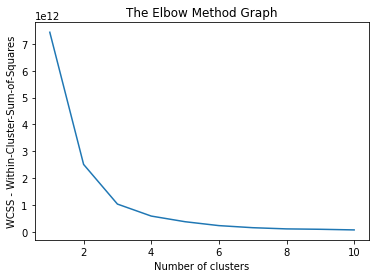

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS - Within-Cluster-Sum-of-Squares')
plt.show()

Số cụm tối ưu theo phương pháp Elbow là 3
Do đó ta phân cụm dữ liệu với số cụm là 3

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [37]:
y_kmeans

array([0, 1, 2, ..., 0, 2, 2])

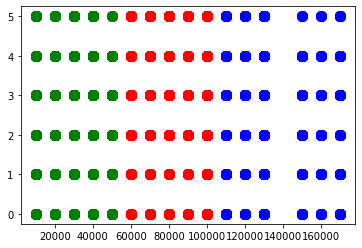

In [38]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label = 'Cluster 3')

:)) wtf 